In [3]:
import numpy as np
import ice_funcs as icef
import snowflake_plot as snp

import matplotlib.pyplot as plt



# NOTES

Serious potential appearing with b=0.2, alpha_max=3....

## Influence de la forme fonctionnelle quand b=10
---> pas mal rien!




# SERIOUS OBSERVATIONS

- Small seed cystal leads to strange non complex patterns (numerical anisotropy???)
- Explain dentricity
- THE KINK FACTOR MUST BE EXPLORED MORE and where it needs to go...


In [4]:
L = 501 # Length of simulation zone

# initialising snowflake class
SnowflakeSim = icef.SnowflakeSimulation(L)

# defining physical parameters
""" GAS KINETICS """
SnowflakeSim.PhysicsU.X_0 = 1
SnowflakeSim.PhysicsU.v_kin = 1 # not sure this does much except time

""" ATTACHMENT """
SnowflakeSim.PhysicsU.max_alpha = 1
SnowflakeSim.PhysicsU.b = 0.2

""" GEOMETRY CONTROL """
SnowflakeSim.PhysicsU.D_x = 1


print("Starting simulation")

final_ice_map = SnowflakeSim.run_simulation(5000, initial_seed_half_width=100)

Starting simulation
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800


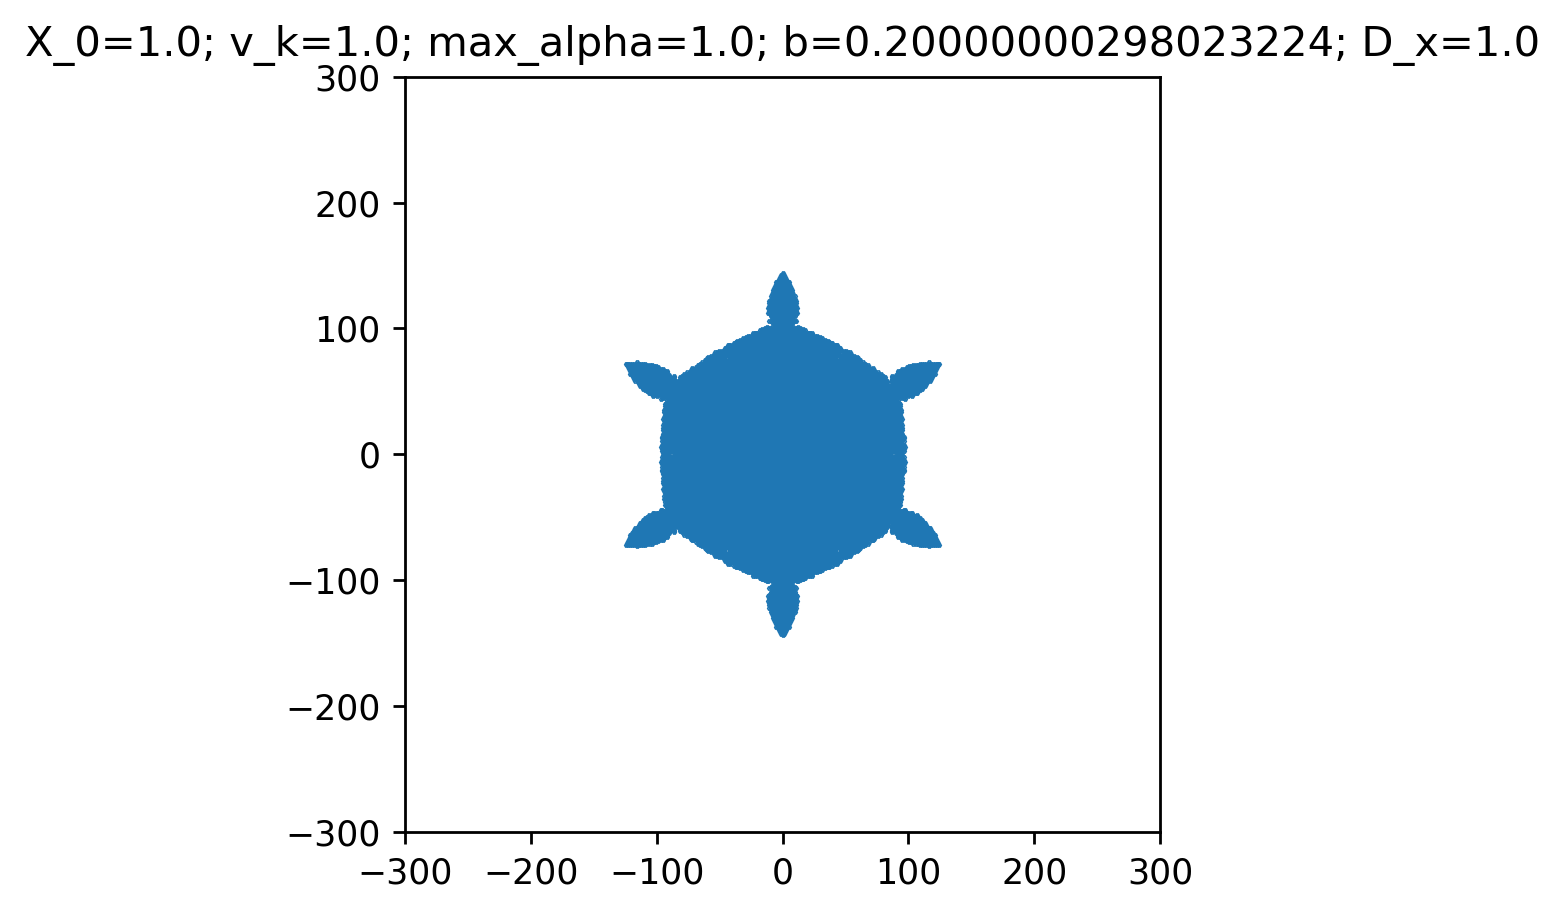

In [6]:
demi_largeur = 300

params = {"figure.dpi":250}
plt.rcParams.update(params)

converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(final_ice_map)



plt.figure()

plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.title(f"X_0={SnowflakeSim.PhysicsU.X_0}; v_k={SnowflakeSim.PhysicsU.v_kin}; max_alpha={SnowflakeSim.PhysicsU.max_alpha}; b={SnowflakeSim.PhysicsU.b}; D_x={SnowflakeSim.PhysicsU.D_x}") ###################################### SO ON SO FORTH

plt.show()